In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/AID/animal.zip

Archive:  gdrive/MyDrive/AID/animal.zip
   creating: animal_dataset/images/
   creating: animal_dataset/images/train/
  inflating: animal_dataset/images/train/1.jpg  
  inflating: animal_dataset/images/train/10.jpg  
  inflating: animal_dataset/images/train/1000.jpg  
  inflating: animal_dataset/images/train/1001.jpg  
  inflating: animal_dataset/images/train/1002.jpg  
  inflating: animal_dataset/images/train/1003.jpg  
  inflating: animal_dataset/images/train/1004.jpg  
  inflating: animal_dataset/images/train/1005.jpg  
  inflating: animal_dataset/images/train/1006.jpg  
  inflating: animal_dataset/images/train/1007.jpg  
  inflating: animal_dataset/images/train/1008.jpg  
  inflating: animal_dataset/images/train/1009.jpg  
  inflating: animal_dataset/images/train/101.jpg  
  inflating: animal_dataset/images/train/1010.jpg  
  inflating: animal_dataset/images/train/1011.jpg  
  inflating: animal_dataset/images/train/1012.jpg  
  inflating: animal_dataset/images/train/1013.jpg  
  in

In [2]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=6ae92398a784c0f13b1888c89ba42e4d595d479283ef058007e6542c34b20794
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)


In [2]:
# Train YOLOv5s
!python train.py --img 415 --batch 31 --epochs 101 --data coco128.yaml --weights yolov5s.pt --cache

2024-05-14 15:28:48.504253: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 15:28:48.504311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 15:28:48.505889: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=101, batch_size=31, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, op

In [7]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 196 --conf 0.25 --source ../drive/MyDrive/images/52142568768_b03923c05a_b.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=../drive/MyDrive/images/52142568768_b03923c05a_b.jpg, data=data/coco128.yaml, imgsz=[196, 196], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ --img-size [196, 196] must be multiple of max stride 32, updating to [224, 224]
image 1/1 /content/drive/MyDrive/images/52142568768_b03923c05a_b.jpg: 160x224 1 zebra, 49.4ms
Speed: 0.4ms pre-process, 49.4ms inference, 487.8ms NMS per image at shape (1, 3, 224, 224)
Results saved to ru

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


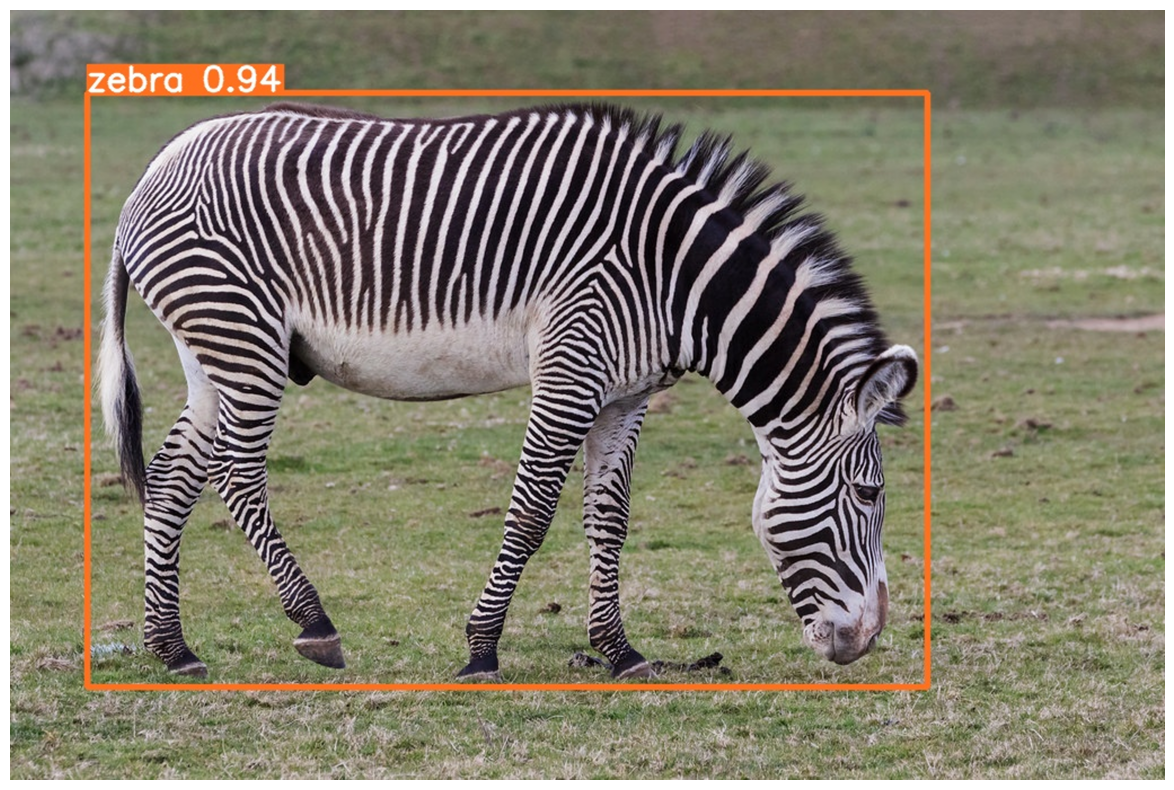

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("/content/yolov5/runs/detect/exp4/52142568768_b03923c05a_b.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()